In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table

In [2]:
t = Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot', format='votable')
print(t.colnames)


Source = t["Source"]
Gmag = t["X.Gmag."]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
Qfl = t["Qfl"]






['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


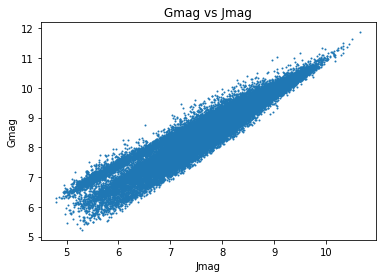

In [8]:
plt.title("Gmag vs Jmag")
plt.scatter(Jmag,Gmag,s=1.0)
plt.xlabel("Jmag")
plt.ylabel("Gmag")
plt.show()

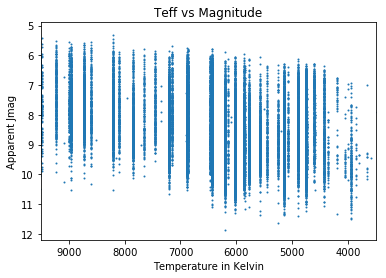

In [11]:
Teff = t["Teff"]
plt.title("Teff vs Magnitude")
plt.scatter(Teff,Gmag,s=1.0)
plt.xlabel("Temperature in Kelvin")
plt.ylabel("Apparent Jmag")
plt.xlim(3500,9500)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

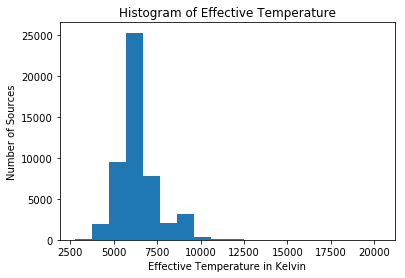

In [20]:
temps = [2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500]
test = []
#for i in range(0,len(Teff)):
#    if(Teff[i] >= 5000 & Teff[i] <= 5500):
#        test.append(Teff[i])
#        print(test[i])

bins = 18
plt.xlabel("Effective Temperature in Kelvin")
plt.ylabel("Number of Sources")
plt.title("Histogram of Effective Temperature")
pltemp=plt.hist(Teff,bins)
plt.show()


In [5]:
SpType = t['SpType']
Sp = [0.0]*len(SpType)
SpV = []
for i in range(0,len(SpType)):
    Spc = SpType[i].decode()
    if(len(Spc) > 2):
        for c in range(0,len(Spc)):
            if(Spc[c] == 'V'):
                Sp[i] = Sp[i] + 5
            if(Sp[c] == 'I'):
                Sp[i] = Sp[i] + 1
            if(Sp[c] == '+'):
                Sp[i] = -1
    else:
        Sp[i] = 5.1
    if(Sp[i] == 6):
        Sp[i] = 4
    if(Sp[i] < 0.0):
        Sp[i] = -1
    if(Sp[i] == 11):
        Sp[i] = 4.5
    if(Sp[i] == 9):
        Sp[i] = 3.5
            
for i in range(0,len(Sp)):
    if(Sp[i] == 5 or Sp[i] == 5.1):
        SpV.append(Sp[i])
print(len(SpType))        
print(len(Sp))
print(len(SpV))
print(SpV[0:30])

50093
50093
44683
[5.1, 5.1, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 5.1, 5.1, 5.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [32]:

Teff = t['Teff']
Plx = t["Plx"]

temp = np.linspace(3500,10000,num=14)
print(temp)
#18 sets of ranges
tempRange = []
PlxRange = []
JmagRange = []
GmagRange = []
HmagRange = []
KmagRange = []
VmagRange = []
dist = []
Sp_str = str(Sp)

def AbsoluteMag(mag,dist):
    return mag - (5*np.log10(dist/10))

for low in temp:
    high = low + 500
    for i in range(0,len(Teff)):
        if(low <= Teff[i] <= high):
            if(Teff.mask[i] == False):
                tempRange.append(Teff[i])
                JmagRange.append(Jmag[i])
                GmagRange.append(Gmag[i])
                HmagRange.append(Hmag[i])
                KmagRange.append(Kmag[i])
                VmagRange.append(Vmag[i])
                PlxRange.append(Plx[i])
                dist.append(1000/Plx[i])
    #plt.hist(tempRange,bins=25)
    #TempValMask = ma.masked_outside(temp,low,high)
    #TempValComp = TempValMask.compressed()
    #plt.hist(TempValComp,bins=15)
    #plt.show()    
    for j in range(0,len(tempRange)):
        JmagRange[j] = AbsoluteMag(JmagRange[j],dist[j])
        GmagRange[j] = AbsoluteMag(GmagRange[j],dist[j])
        HmagRange[j] = AbsoluteMag(HmagRange[j],dist[j])
        KmagRange[j] = AbsoluteMag(KmagRange[j],dist[j])
        VmagRange[j] = AbsoluteMag(VmagRange[j],dist[j])
    print("There are ", len(tempRange), " stars in the range", low, " - ", high)
    print("\n","Mean: ", np.mean(tempRange))
    print("Standard Deviation: ", np.std(tempRange))
    print("Max: ", np.max(tempRange))
    print("Min: ", np.min(tempRange))
    print("\n")
    print("Standard Deviation for Absolute Jmag", np.std(JmagRange))
    #print("There are ", len(TempValComp), "in the range", low, " - ", high)
    #tempRange = []

[  3500.   4000.   4500.   5000.   5500.   6000.   6500.   7000.   7500.
   8000.   8500.   9000.   9500.  10000.]
There are  275  stars in the range 3500.0  -  4000.0

 Mean:  3920.14545455
Standard Deviation:  93.6180670562
Max:  4000
Min:  3530


Standard Deviation for Absolute Jmag nan


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


There are  1131  stars in the range 4000.0  -  4500.0

 Mean:  4259.34571176
Standard Deviation:  219.736430467
Max:  4420
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  6223  stars in the range 4500.0  -  5000.0

 Mean:  4673.33440463
Standard Deviation:  231.626417363
Max:  4900
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  10828  stars in the range 5000.0  -  5500.0

 Mean:  4883.65903214
Standard Deviation:  304.259629527
Max:  5500
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  15768  stars in the range 5500.0  -  6000.0

 Mean:  5168.48236936
Standard Deviation:  494.176794431
Max:  5860
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  36728  stars in the range 6000.0  -  6500.0

 Mean:  5786.07166195
Standard Deviation:  639.840071778
Max:  6470
Min:  3530


Standard Deviation for Absolute Jmag nan
There are  41701  stars in the range 6500.0  -  7000.0

 Mean:  5917.38951104
Standard Deviation:  698.524970158

In [33]:
print(dist)
print(JmagRange[0:20])
      

[76.452599834317311, 125.15644914218247, 82.576385495487372, 153.1393518943469, 188.32391916685143, 192.30769936149667, 83.472457279687688, 176.99114745501041, 189.75332136987805, 190.47619047619048, 25.157232704402517, 89.126557593640058, 100.80645083760868, 183.82352747822304, 189.39393186810071, 88.495573727505203, 177.93594668383506, 144.92753422878744, 27.005131865116091, 139.27576934655576, 146.41288596931432, 76.745972409315854, 140.64697344888933, 185.52876155301709, 47.505939964092917, 21.834061499084431, 196.07843503911701, 156.24999767169359, 60.060061436101812, 151.51515370448652, 43.196544988258069, 161.55088703650793, 78.92659778834873, 61.124692096115446, 90.909090909090907, 152.43902571991327, 25.523225936981358, 32.206119953987745, 164.20360836527385, 9.7924008333761048, 145.9854034922997, 70.671379997101909, 50.838840677239666, 97.943192582151198, 182.48175118967825, 104.71203979348309, 200.0, 8.7734687712585355, 54.436578895754216, 191.20458821282256, 175.43860236179